In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [42]:
#import the dataset
iris = pd.read_csv('Iris.csv')

#Let's have a look at the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
print(iris.shape)

(150, 6)


In [44]:
iris.drop('Id', axis=1, inplace=True)

# How many data points for each class are present?
print(iris['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## ML Model


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### spliting dataset into features and target

#### features = SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

#### target = Species

In [46]:
X= iris.iloc[:, 0:4] ##predictors
y= iris.iloc[:, 4] ##response variable

### Converting Categorical to Numbers.

In [47]:
# Giving Numerical values to our class labels as we will have to convert them to pytorch tensors.

for i in range(len(y)):
    if y[i] == 'Iris-setosa':
        y[i] = 0
    elif y[i] == 'Iris-versicolor':
        y[i] = 1
    else:
        y[i] = 2

#### Normalizing the X, so the gradient steps converge fast

In [48]:
from sklearn.preprocessing import normalize
X = normalize(X) ##x-mean/std
y = np.array(y)
y = y.astype(int)

#### Splitting data into Train and test parts.

In [49]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size= 0.10, random_state= 1)
print ('X_train shape: ',X_train.shape)
print ('y_train shape: ',y_train.shape)
print ('X_test shape: ',X_test.shape)
print ('y_test shape: ',y_test.shape)

X_train shape:  (135, 4)
y_train shape:  (135,)
X_test shape:  (15, 4)
y_test shape:  (15,)


#### Making NN for the problem, with 2 hidden layers and one output layer. The architecture of neural network look like this

Input layer: 4 Neurons
1st Hidden layer: 27 Neurons
2nd Hidden layer: 9 Neurons
Output Layer: 3 Neurons

Log NLLLoss, negative log likelihood loss will be used. It is useful to train a classification problem with number of classes. SGD, Stochastic gradient descent optimization method, is used to update the weights

In [50]:
from torch import optim
import torch
import torch.nn as nn

In [51]:
model = nn.Sequential(nn.Linear(4, 27), ##4 predictors
                      nn.ReLU(),
                      nn.Linear(27,9), ##hidden layers
                      nn.ReLU(),
                      nn.Linear(9,3), ##3 output classes
                      nn.LogSoftmax(dim= 1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [52]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=27, bias=True)
  (1): ReLU()
  (2): Linear(in_features=27, out_features=9, bias=True)
  (3): ReLU()
  (4): Linear(in_features=9, out_features=3, bias=True)
  (5): LogSoftmax()
)


prediction function that take input and then return the predicted class

In [53]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis= 1)

In [54]:
# making torch tensors base data that can be used for training. 
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long() 

In [55]:
epochs= 1000
batch_size= 15
n_batches = 9

costs = []
test_accuracies = []
for e in range(epochs):
    running_loss = 0
    for j in range(n_batches):
        ## taking a batch of data for training, taking only 15 entries for training at one time.
        Xbatch = X_train[j*batch_size:(j+1)*batch_size]
        Ybatch = y_train[j*batch_size:(j+1)*batch_size]
        
        ##---------------------------------------##
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad() # accumulates the gradients on subsequent backward passes.
        output = model(Xbatch)#forward propagation
        loss = criterion(output, Ybatch)# calculating the loss
        loss.backward()# performing backward propagation
        optimizer.step()# updating the weight
        running_loss += loss.item()# finding the loss during this step.
        ##---------------------------------------##
        
        
    Ypred = predict(model, X_test)
    
    acc = np.mean(y_test == Ypred)
    
    print("Epoch: %d, cost: %f, accuracy: %.2f" % (e, running_loss/n_batches, acc))
    
    costs.append(running_loss/n_batches)
    test_accuracies.append(acc)

Epoch: 0, cost: 1.103502, accuracy: 0.40
Epoch: 1, cost: 1.102695, accuracy: 0.40
Epoch: 2, cost: 1.101727, accuracy: 0.40
Epoch: 3, cost: 1.100911, accuracy: 0.40
Epoch: 4, cost: 1.100345, accuracy: 0.40
Epoch: 5, cost: 1.099818, accuracy: 0.40
Epoch: 6, cost: 1.099308, accuracy: 0.40
Epoch: 7, cost: 1.098812, accuracy: 0.40
Epoch: 8, cost: 1.098334, accuracy: 0.40
Epoch: 9, cost: 1.097864, accuracy: 0.40
Epoch: 10, cost: 1.097398, accuracy: 0.40
Epoch: 11, cost: 1.096936, accuracy: 0.40
Epoch: 12, cost: 1.096479, accuracy: 0.40
Epoch: 13, cost: 1.096024, accuracy: 0.40
Epoch: 14, cost: 1.095574, accuracy: 0.40
Epoch: 15, cost: 1.095128, accuracy: 0.40
Epoch: 16, cost: 1.094686, accuracy: 0.40
Epoch: 17, cost: 1.094246, accuracy: 0.40
Epoch: 18, cost: 1.093808, accuracy: 0.40
Epoch: 19, cost: 1.093370, accuracy: 0.40
Epoch: 20, cost: 1.092936, accuracy: 0.40
Epoch: 21, cost: 1.092506, accuracy: 0.40
Epoch: 22, cost: 1.092075, accuracy: 0.40
Epoch: 23, cost: 1.091647, accuracy: 0.40
Ep

Epoch: 194, cost: 1.003703, accuracy: 0.60
Epoch: 195, cost: 1.002860, accuracy: 0.60
Epoch: 196, cost: 1.002014, accuracy: 0.60
Epoch: 197, cost: 1.001156, accuracy: 0.60
Epoch: 198, cost: 1.000296, accuracy: 0.60
Epoch: 199, cost: 0.999425, accuracy: 0.60
Epoch: 200, cost: 0.998551, accuracy: 0.60
Epoch: 201, cost: 0.997666, accuracy: 0.60
Epoch: 202, cost: 0.996776, accuracy: 0.60
Epoch: 203, cost: 0.995881, accuracy: 0.60
Epoch: 204, cost: 0.994974, accuracy: 0.60
Epoch: 205, cost: 0.994064, accuracy: 0.60
Epoch: 206, cost: 0.993143, accuracy: 0.60
Epoch: 207, cost: 0.992216, accuracy: 0.60
Epoch: 208, cost: 0.991285, accuracy: 0.60
Epoch: 209, cost: 0.990342, accuracy: 0.60
Epoch: 210, cost: 0.989396, accuracy: 0.60
Epoch: 211, cost: 0.988439, accuracy: 0.60
Epoch: 212, cost: 0.987475, accuracy: 0.60
Epoch: 213, cost: 0.986506, accuracy: 0.60
Epoch: 214, cost: 0.985526, accuracy: 0.60
Epoch: 215, cost: 0.984538, accuracy: 0.60
Epoch: 216, cost: 0.983544, accuracy: 0.60
Epoch: 217,

Epoch: 390, cost: 0.691393, accuracy: 0.60
Epoch: 391, cost: 0.689530, accuracy: 0.60
Epoch: 392, cost: 0.687672, accuracy: 0.60
Epoch: 393, cost: 0.685825, accuracy: 0.60
Epoch: 394, cost: 0.683984, accuracy: 0.60
Epoch: 395, cost: 0.682149, accuracy: 0.60
Epoch: 396, cost: 0.680327, accuracy: 0.60
Epoch: 397, cost: 0.678510, accuracy: 0.60
Epoch: 398, cost: 0.676702, accuracy: 0.60
Epoch: 399, cost: 0.674900, accuracy: 0.60
Epoch: 400, cost: 0.673113, accuracy: 0.60
Epoch: 401, cost: 0.671333, accuracy: 0.60
Epoch: 402, cost: 0.669563, accuracy: 0.60
Epoch: 403, cost: 0.667799, accuracy: 0.60
Epoch: 404, cost: 0.666049, accuracy: 0.60
Epoch: 405, cost: 0.664305, accuracy: 0.60
Epoch: 406, cost: 0.662571, accuracy: 0.60
Epoch: 407, cost: 0.660846, accuracy: 0.60
Epoch: 408, cost: 0.659130, accuracy: 0.60
Epoch: 409, cost: 0.657424, accuracy: 0.60
Epoch: 410, cost: 0.655727, accuracy: 0.60
Epoch: 411, cost: 0.654043, accuracy: 0.60
Epoch: 412, cost: 0.652370, accuracy: 0.60
Epoch: 413,

Epoch: 581, cost: 0.488398, accuracy: 0.80
Epoch: 582, cost: 0.487881, accuracy: 0.80
Epoch: 583, cost: 0.487367, accuracy: 0.80
Epoch: 584, cost: 0.486855, accuracy: 0.80
Epoch: 585, cost: 0.486346, accuracy: 0.80
Epoch: 586, cost: 0.485839, accuracy: 0.80
Epoch: 587, cost: 0.485335, accuracy: 0.80
Epoch: 588, cost: 0.484834, accuracy: 0.80
Epoch: 589, cost: 0.484336, accuracy: 0.80
Epoch: 590, cost: 0.483840, accuracy: 0.80
Epoch: 591, cost: 0.483346, accuracy: 0.80
Epoch: 592, cost: 0.482855, accuracy: 0.80
Epoch: 593, cost: 0.482366, accuracy: 0.80
Epoch: 594, cost: 0.481879, accuracy: 0.80
Epoch: 595, cost: 0.481396, accuracy: 0.80
Epoch: 596, cost: 0.480915, accuracy: 0.80
Epoch: 597, cost: 0.480437, accuracy: 0.80
Epoch: 598, cost: 0.479962, accuracy: 0.80
Epoch: 599, cost: 0.479488, accuracy: 0.80
Epoch: 600, cost: 0.479016, accuracy: 0.80
Epoch: 601, cost: 0.478547, accuracy: 0.80
Epoch: 602, cost: 0.478079, accuracy: 0.80
Epoch: 603, cost: 0.477614, accuracy: 0.80
Epoch: 604,

Epoch: 772, cost: 0.414606, accuracy: 1.00
Epoch: 773, cost: 0.414273, accuracy: 1.00
Epoch: 774, cost: 0.413939, accuracy: 1.00
Epoch: 775, cost: 0.413606, accuracy: 1.00
Epoch: 776, cost: 0.413272, accuracy: 1.00
Epoch: 777, cost: 0.412938, accuracy: 1.00
Epoch: 778, cost: 0.412605, accuracy: 1.00
Epoch: 779, cost: 0.412271, accuracy: 1.00
Epoch: 780, cost: 0.411937, accuracy: 1.00
Epoch: 781, cost: 0.411604, accuracy: 1.00
Epoch: 782, cost: 0.411270, accuracy: 1.00
Epoch: 783, cost: 0.410936, accuracy: 1.00
Epoch: 784, cost: 0.410603, accuracy: 1.00
Epoch: 785, cost: 0.410269, accuracy: 1.00
Epoch: 786, cost: 0.409935, accuracy: 1.00
Epoch: 787, cost: 0.409601, accuracy: 1.00
Epoch: 788, cost: 0.409268, accuracy: 1.00
Epoch: 789, cost: 0.408934, accuracy: 1.00
Epoch: 790, cost: 0.408600, accuracy: 1.00
Epoch: 791, cost: 0.408266, accuracy: 1.00
Epoch: 792, cost: 0.407932, accuracy: 1.00
Epoch: 793, cost: 0.407599, accuracy: 1.00
Epoch: 794, cost: 0.407265, accuracy: 1.00
Epoch: 795,

Epoch: 964, cost: 0.349100, accuracy: 1.00
Epoch: 965, cost: 0.348745, accuracy: 1.00
Epoch: 966, cost: 0.348390, accuracy: 1.00
Epoch: 967, cost: 0.348034, accuracy: 1.00
Epoch: 968, cost: 0.347679, accuracy: 1.00
Epoch: 969, cost: 0.347324, accuracy: 1.00
Epoch: 970, cost: 0.346968, accuracy: 1.00
Epoch: 971, cost: 0.346612, accuracy: 1.00
Epoch: 972, cost: 0.346257, accuracy: 1.00
Epoch: 973, cost: 0.345901, accuracy: 1.00
Epoch: 974, cost: 0.345545, accuracy: 1.00
Epoch: 975, cost: 0.345189, accuracy: 1.00
Epoch: 976, cost: 0.344832, accuracy: 1.00
Epoch: 977, cost: 0.344476, accuracy: 1.00
Epoch: 978, cost: 0.344119, accuracy: 1.00
Epoch: 979, cost: 0.343763, accuracy: 1.00
Epoch: 980, cost: 0.343407, accuracy: 1.00
Epoch: 981, cost: 0.343050, accuracy: 1.00
Epoch: 982, cost: 0.342693, accuracy: 1.00
Epoch: 983, cost: 0.342336, accuracy: 1.00
Epoch: 984, cost: 0.341978, accuracy: 1.00
Epoch: 985, cost: 0.341621, accuracy: 1.00
Epoch: 986, cost: 0.341264, accuracy: 1.00
Epoch: 987,

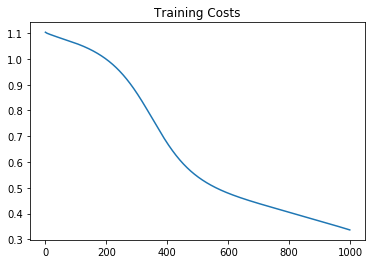

In [56]:
%matplotlib inline
plt.plot(costs)
plt.title("Training Costs")
plt.show()

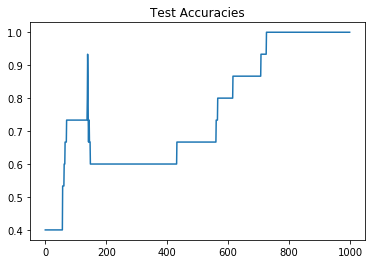

In [57]:
plt.plot(test_accuracies)
plt.title("Test Accuracies")
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
ypred = predict(model, X_test)

print("Accuracy Score is {}".format(accuracy_score(y_test, ypred)))

Accuracy Score is 1.0
